In [36]:
import numpy as np
import pandas as pd

#graphs        
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [37]:
df_train = pd.read_csv('/Users/swaruptripathy/Desktop/Data Science and AI/Datasets/titanic_train.csv')
df_test = pd.read_csv('/Users/swaruptripathy/Desktop/Data Science and AI/Datasets/titanic_test.csv')
full_data = [df_train,df_test]

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [39]:
# Function to calculate no. of null values with percentage in the dataframe
def null_values(DataFrame_Name):
    
    sum_null = DataFrame_Name.isnull().sum()
    total_count = DataFrame_Name.isnull().count()
    percent_nullvalues = sum_null/total_count * 100
    df_null = pd.DataFrame()
    df_null['Total_values'] = total_count
    df_null['Null_Count'] = sum_null
    df_null['Percent'] = percent_nullvalues
    df_null = df_null.sort_values(by='Null_Count',ascending = False)

    return(df_null)

In [40]:
null_values(df_train)

,Total_values,Null_Count,Percent
Cabin,891,687,77.104377
Age,891,177,19.865320
Embarked,891,2,0.224467
PassengerId,891,0,0.000000
Survived,891,0,0.000000
Pclass,891,0,0.000000
Name,891,0,0.000000
Sex,891,0,0.000000
SibSp,891,0,0.000000
Parch,891,0,0.000000


In [41]:
null_values(df_test)

,Total_values,Null_Count,Percent
Cabin,418,327,78.229665
Age,418,86,20.574163
Fare,418,1,0.239234
PassengerId,418,0,0.000000
Pclass,418,0,0.000000
Name,418,0,0.000000
Sex,418,0,0.000000
SibSp,418,0,0.000000
Parch,418,0,0.000000
Ticket,418,0,0.000000


In [42]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Correlation

In [44]:
## get the most important variables. 
corr = df_train.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Pclass         0.114569
Fare           0.066207
Parch          0.006663
Age            0.005963
SibSp          0.001248
PassengerId    0.000025
Name: Survived, dtype: float64

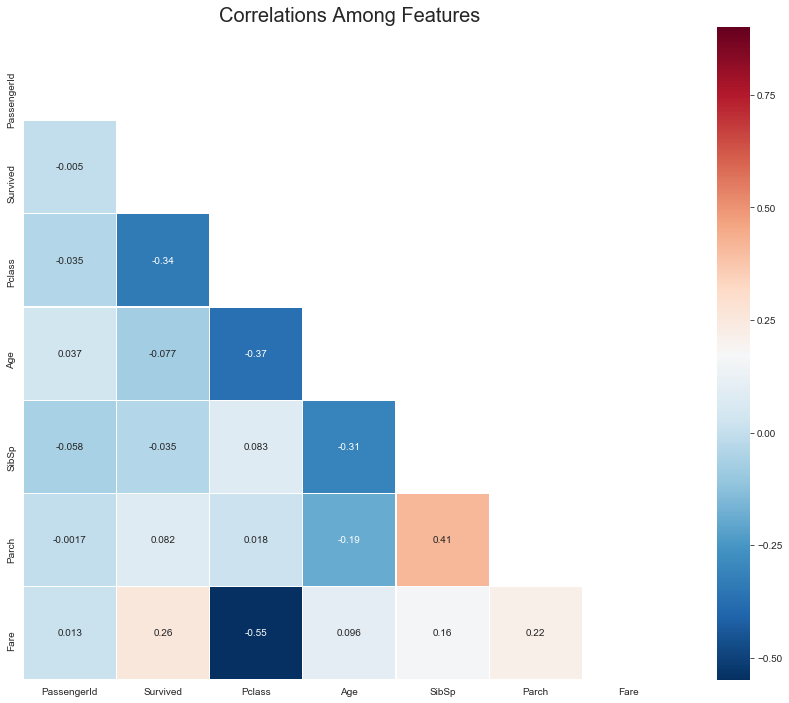

In [45]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sb.heatmap(df_train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

# Pclass

In [46]:
# Lets start with Pclass column - Already an integer - good
# Lets check the impact of this column on the survived column in the train dataset.
# We will calculate mean of survived people in each class - This will tell us how many survived out of total for each class
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


From the above calculation, it seems like passenger from class1 ( mostly rich ) survived with a maximum percentage
and passengers from a lower class survived least

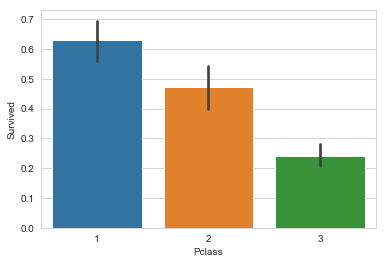

In [47]:
sb.barplot('Pclass','Survived', data=df_train)

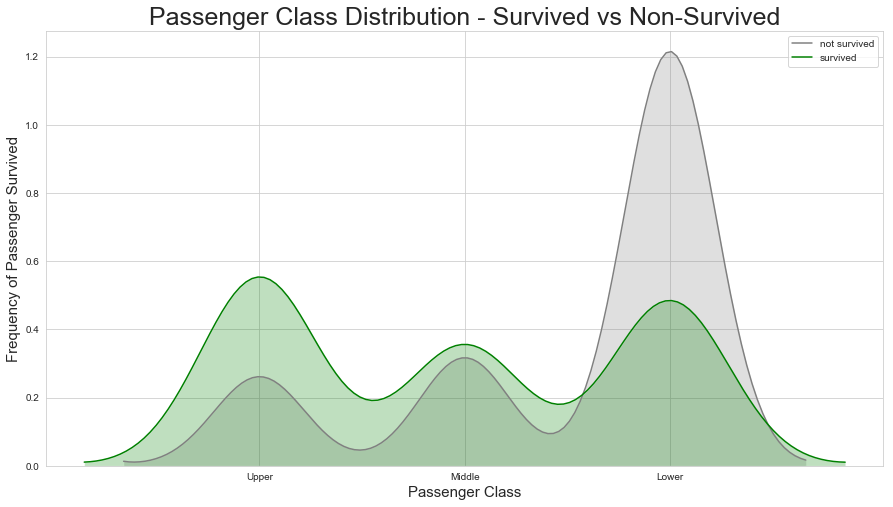

In [48]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sb.kdeplot(df_train.Pclass[df_train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sb.kdeplot(df_train.loc[(df_train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(df_train.Pclass.unique()), labels);

# Sex

In [49]:
females=df_train['Sex'].apply(lambda x: x.count('female')).sum()
print('Total males=',891-females)
print('Total females=',females)

Total males= 577
Total females= 314


In [50]:
# Now lets focus on the Sex column and evaluate its impact on the survived column
df_train[['Sex','Survived']].groupby(['Sex'],as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


From the above calculation it is clear that the female survival rate is much higher than the male survivor rate

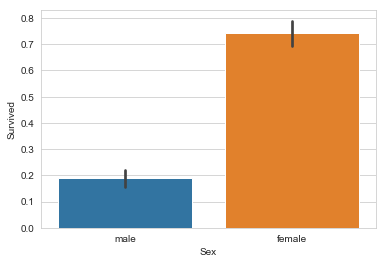

In [51]:
sb.barplot(x='Sex', y='Survived', data=df_train)

# Embarked

In [52]:
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


People with destination C = Cherbourg (C = Cherbourg, Q = Queenstown, S = Southampton) survived with highest percentage

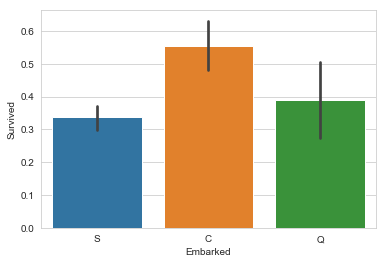

In [53]:
sb.barplot(x='Embarked', y='Survived', data=df_train)

# SibSp & Parch = Family_members

Lets create a new feature column by combining sibling/spouse & parent/children column

In [54]:
df_train['Family_members'] = df_train['SibSp'] + df_train['Parch']
df_test['Family_members'] = df_test['SibSp'] + df_test['Parch']
df_train[['Family_members','Survived']].groupby(['Family_members'],as_index=False).mean()


,Family_members,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


From the above calculation, we can conclude that - Survival percentage is higher when Family members are #1,2,3
It is less when you are alone or have family members > 3

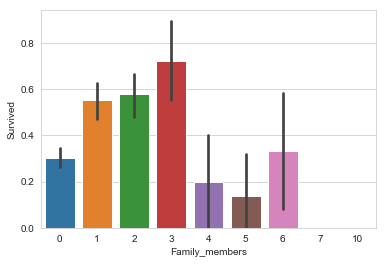

In [55]:
sb.barplot(x='Family_members', y='Survived', data=df_train)

In [56]:
df_train = df_train.drop(['PassengerId'],axis=1)
#df_test = df_test.drop(['PassengerId'],axis=1)

In [57]:
full_data = [df_train,df_test]


# Lets focus on the Missing Values
Cabin - Removing this column from the dataset- 80% missing values

In [58]:
df_train = df_train.drop(['Cabin','Ticket'],axis=1)

df_test = df_test.drop(['Cabin','Ticket'],axis=1)

In [59]:
full_data = [df_train,df_test]

In [60]:
for dataset in full_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [61]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


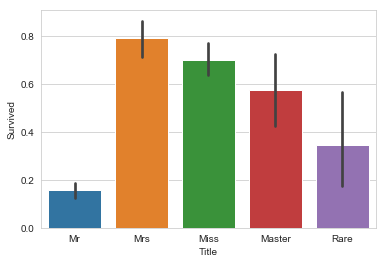

In [64]:
sb.barplot(x='Title', y='Survived', data=df_train)

In [65]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Mr
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1,Mrs


In [66]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,LabelBinarizer
#cat_features = df_train['Title']
#encoder = LabelBinarizer()
#new_cat_features = encoder.fit_transform(cat_features)
#new_cat_features

#pd.get_dummies(df_train, columns=['Title'], prefix=['Title'])

In [67]:
df_train = df_train.drop(['Name'],axis = 1)
df_test = df_test.drop(['Name'],axis = 1)


# Age
We will find the average age for every category in the age column and then impute the mean value for the respective category

In [68]:

df_train[['Title','Age']].groupby(['Title'],as_index = False).mean().sort_values(by='Age')

,Title,Age
0,Master,4.574167
1,Miss,21.845638
2,Mr,32.368090
3,Mrs,35.788991
4,Rare,45.545455


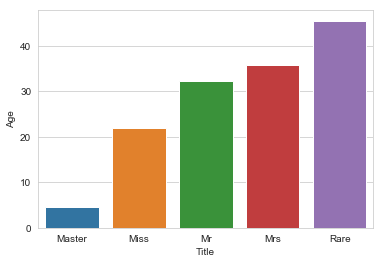

In [69]:
Mean_Age = df_train[['Title','Age']].groupby(['Title'],as_index = False).mean().sort_values(by='Age')
sb.barplot(x='Title', y='Age', data=Mean_Age)

In [70]:
df_train['Age'] = df_train['Age'].fillna(-1)
df_test['Age'] = df_test['Age'].fillna(-1)  
full_data = [df_train,df_test]

# Age
Null Values - 20% - Imputing the mean value per category as calculated above

In [71]:

for dataset in full_data:
    
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Master'), 'Age'] = 4.57
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Miss'), 'Age'] = 21.84
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Mr'), 'Age'] = 32.36
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Mrs'), 'Age'] = 35.78
    dataset.loc[(dataset['Age'] == -1) &(dataset['Title'] == 'Rare'), 'Age'] = 45.54
    dataset['Age'] = dataset['Age'].astype(int)   
    

Now creating different age bands...

In [72]:
full_data = [df_train, df_test]
for dataset in full_data:
    
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

In [73]:
df_train[['Sex','Age','Survived']].groupby(['Sex','Age'],as_index=False).mean()

,Sex,Age,Survived
0,female,0,0.593750
1,female,1,0.750000
2,female,2,0.671875
3,female,3,0.756757
4,female,4,0.767442
5,female,5,0.851852
6,female,6,0.770833
7,male,0,0.550000
8,male,1,0.114286
9,male,2,0.109375


/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Text(0.5, 0.98, 'AgeBand,Sex vs Survived')

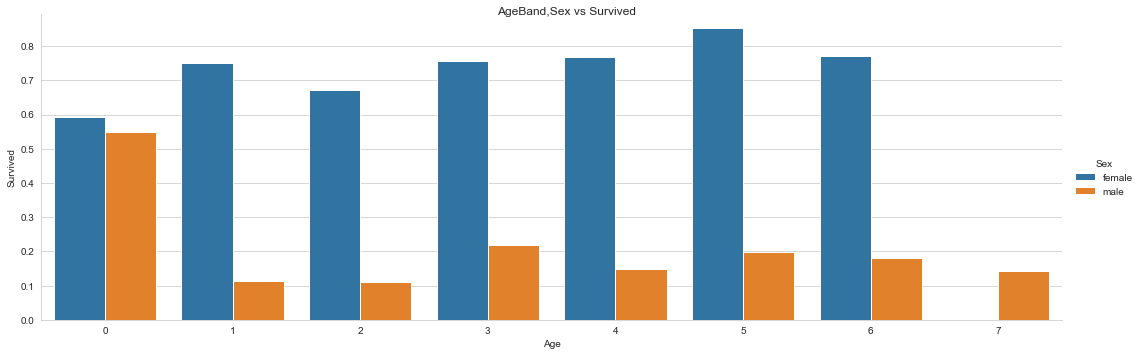

In [74]:
agesexsurv = df_train[['Sex','Age','Survived']].groupby(['Sex','Age'],as_index=False).mean()
sb.factorplot('Age','Survived','Sex', data=agesexsurv
                ,aspect=3,kind='bar')
plt.suptitle('AgeBand,Sex vs Survived')

# I want to create different categories for family members
as calculated above
Family_members vs Survived


category 0 = person is alone - survival chance = 30%,
category 1 = person has family members = 1,2 - survival chance = 56%,
category 2 = person has family members = 3 - survival chance = 72%
category 3 = person has family members = 4,5 - survival chance = approx 17%,
category 4 = person has family members = 6 - survival chance = 33%
category 5 = person has family members = 7,10 - survival chance = 0%


In [75]:
full_data = [df_train, df_test]
for dataset in full_data:
    
    dataset.loc[ dataset['Family_members'] == 0, 'Family_members_Band'] = 0
    dataset.loc[(dataset['Family_members'] == 1)|(dataset['Family_members'] == 2),'Family_members_Band'] = 1
    dataset.loc[ dataset['Family_members'] == 3, 'Family_members_Band'] = 2
    dataset.loc[(dataset['Family_members'] == 4)|(dataset['Family_members'] == 5),'Family_members_Band'] = 3
    dataset.loc[ dataset['Family_members'] == 6, 'Family_members_Band'] = 4
    dataset.loc[(dataset['Family_members'] == 7)|(dataset['Family_members'] == 10),'Family_members_Band'] = 5
    dataset['Family_members_Band'] = dataset['Family_members_Band'].astype(int)

# Creating Categories for Fare column

In [76]:
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)
df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


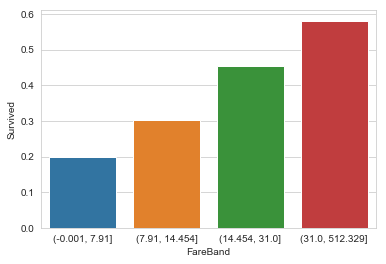

In [77]:
FarePlot = df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand')
sb.barplot(x='FareBand', y='Survived', data=FarePlot)

In [78]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].dropna().mean()) # df_test has one null value

In [79]:
full_data = [df_train,df_test]
for dataset in full_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare_Band'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare_Band'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare_Band'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare_Band'] = 3
    dataset['Fare_Band'] = dataset['Fare_Band'].astype(int)

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



Text(0.5, 0.98, 'FareBand,Sex vs Survived')

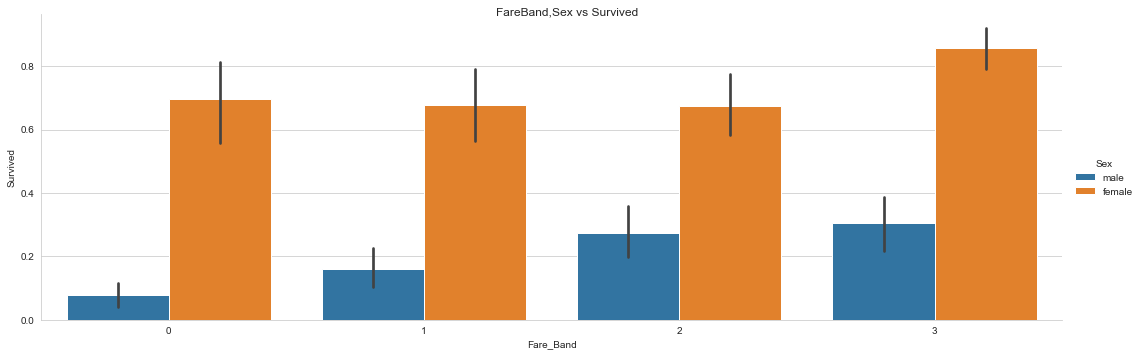

In [80]:
sb.factorplot('Fare_Band','Survived','Sex', data=df_train
                ,aspect=3,kind='bar')
plt.suptitle('FareBand,Sex vs Survived')

From the above graph, thing to notice is that: the males survival rate increases as the fare for the ticket increases but for the females, the survival rate is almost similar for all the fare bands

# Embarked Column

In [81]:
most_frequent = df_train['Embarked'].mode()[0]
most_frequent

'S'

In [82]:
full_data = [df_train,df_test]
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_frequent)
    
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


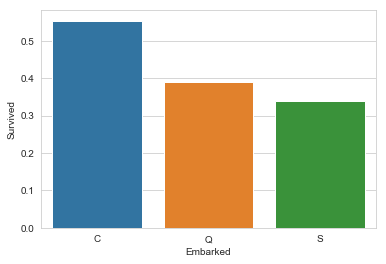

In [83]:
embarkedgraph = df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sb.barplot(x='Embarked',y='Survived',data=embarkedgraph)


Dropping Values

In [84]:
df_train = df_train.drop(['SibSp','Parch','Fare','Family_members','FareBand'],axis = 1)


In [85]:
df_test = df_test.drop(['SibSp','Parch','Fare','Family_members'],axis = 1)


# One Hot Encoding

In [86]:
X_train = pd.get_dummies(df_train, columns=['Pclass','Sex','Age','Embarked','Title','Family_members_Band','Fare_Band'], prefix=['Pclass','Sex'
                                                                ,'Age','Embarked','Title','Family_members_Band','Fare_Band'])

In [87]:
Y_train = X_train['Survived']
X_train = X_train.drop('Survived', axis=1)

In [88]:
X_train.shape

(891, 31)

In [89]:
X_test = pd.get_dummies(df_test, columns=['Pclass','Sex','Age','Embarked','Title','Family_members_Band','Fare_Band'], prefix=['Pclass','Sex','Age','Embarked','Title','Family_members_Band','Fare_Band'])

In [90]:
X_test.shape

(418, 32)

In [91]:
X_test=X_test.drop(['PassengerId'],axis=1)

# Testing Machine Learning Models

In [92]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

72.05 %


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning:

max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.



In [93]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.01 %


In [94]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

83.61 %


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [95]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

85.86 %


In [96]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

63.64 %


In [97]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

83.39 %


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning:

max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.



In [98]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

82.83 %


In [99]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

90.01 %


In [100]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)

result_df.head(9)

,Model,Score
3,Random Forest,90.01
7,Decision Tree,90.01
1,KNN,85.86
2,Logistic Regression,83.61
5,Perceptron,83.39
0,Support Vector Machines,82.83
6,Stochastic Gradient Decent,72.05
4,Naive Bayes,63.64


# Best Model

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



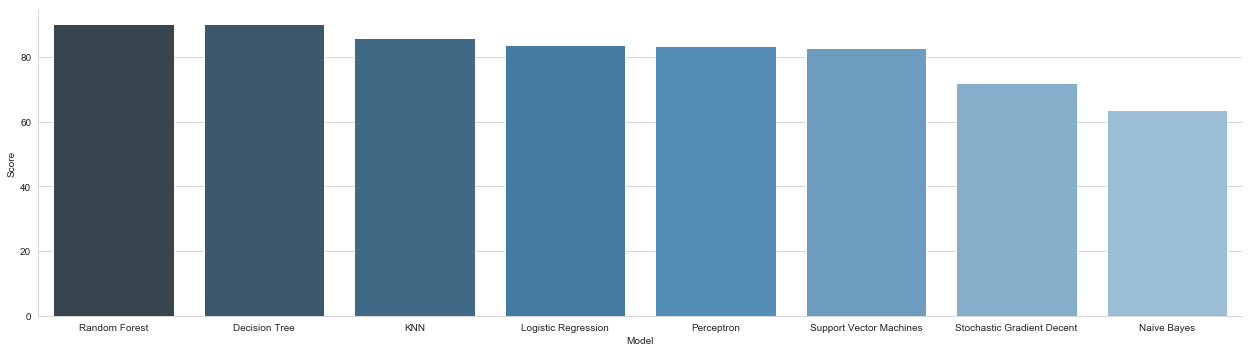

In [101]:
bestmodelgraph = result_df.head(9)
ax = sb.factorplot("Model", y="Score", data=bestmodelgraph,
                palette='Blues_d',aspect=3.5,kind='bar')

# K-FOLD Validation

In [102]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [103]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.84444444 0.75280899 0.86516854 0.87640449 0.84269663
 0.85393258 0.80898876 0.82022472 0.84090909]
Mean: 0.8305578254454659
Standard Deviation: 0.03441539649126446


In [104]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

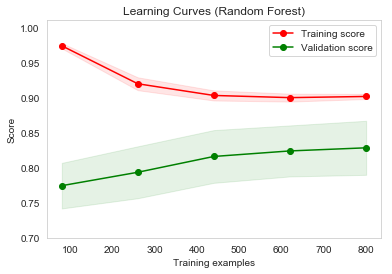

In [105]:
# Plot learning curves
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

title = "Learning Curves (Random Forest)"
cv = 10
plot_learning_curve(rf, title, X_train, Y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# Feature Importance

In [106]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



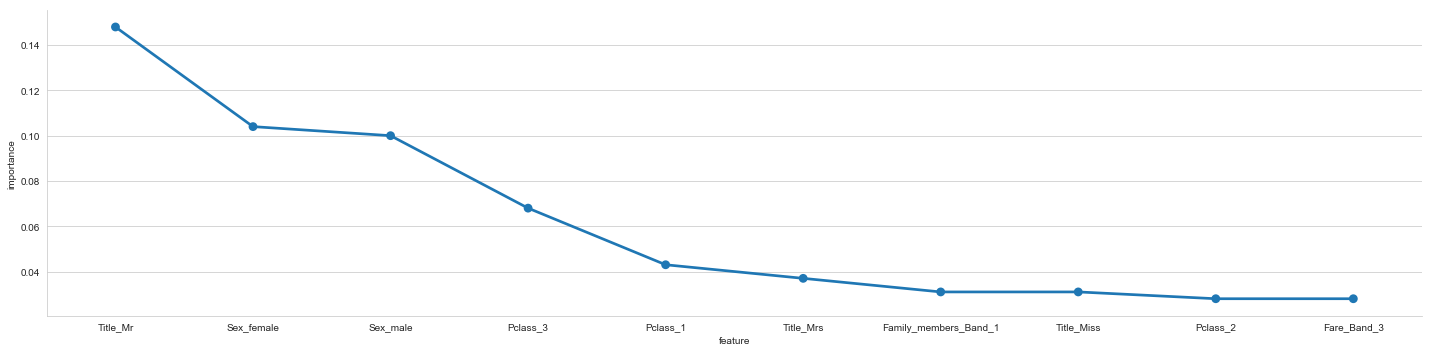

In [107]:
importances_most = importances.head(10) # 10 most important features
axes = sb.factorplot('feature','importance', 
                      data=importances_most, aspect = 4, )

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



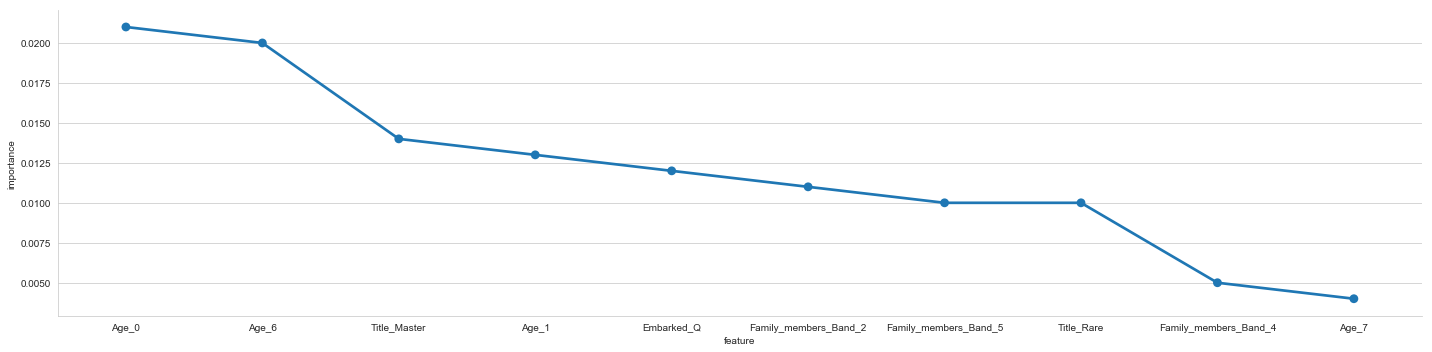

In [108]:
importances_least = importances.tail(10) # least 10 important features
axes = sb.factorplot('feature','importance', 
                      data=importances_least, aspect = 4,)

In [109]:
# Random Forest , Testing with oob score

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.01 %


# OOB Score

Our random forest model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the out-of-bag samples to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [110]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.72 %


# Hyperparameter Tuning
Below you can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.

I put this code into a markdown cell and not into a code cell, because it takes a long time to run it. Directly underneeth it, I put a screenshot of the gridsearch's output.

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.bestparams

# Testing new parameters from hypertuning

In [111]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.82000000000001 %


Now that we have a proper model, we can start evaluating it's performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy. The problem is just, that it's more complicated to evaluate a classification model than a regression model. We will talk about this in the following section.

# Confusion Matrix

In [112]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[489,  60],
       [100, 242]])

The first row is about the not-survived-predictions: 489 passengers were correctly classified as not survived (called true negatives) and 60 were wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 100 passengers where wrongly classified as survived (false negatives) and 242 were correctly classified as survived (true positives).

In [113]:
conf_mat = confusion_matrix(Y_train, predictions)
TP = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[1][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('Sensitivity, hit rate, recall, or true positive rate=',TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('Specificity or true negative rate=',TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('Precision or positive predictive value=',PPV)

# Negative predictive value
NPV = TN/(TN+FN)
print('Negative predictive value=',NPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print('Fall out or false positive rate=',FPR)

# False negative rate
FNR = FN/(TP+FN)
print('False negative rate=',FNR)

# False discovery rate
FDR = FP/(TP+FP)
print('False discovery rate=',FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('Overall accuracy=',ACC)

Sensitivity, hit rate, recall, or true positive rate= 0.830220713073005
Specificity or true negative rate= 0.8013245033112583
Precision or positive predictive value= 0.8907103825136612
Negative predictive value= 0.7076023391812866
Fall out or false positive rate= 0.1986754966887417
False negative rate= 0.1697792869269949
False discovery rate= 0.1092896174863388
Overall accuracy= 0.8204264870931538


In [114]:
positives = pd.DataFrame({
    'Factor': ['True Positives', 'False Positives', ],
    'Score': [TP, FP]})


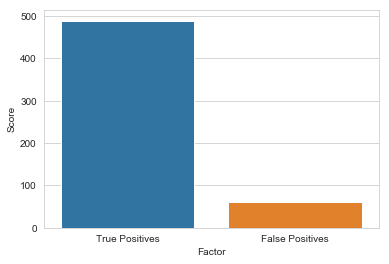

In [115]:
sb.barplot(x='Factor',y='Score',data=positives)

In [116]:
negatives = pd.DataFrame({
    'Factor':['True Negative', 'False Negative'],
    'Score':[TN, FN]
})


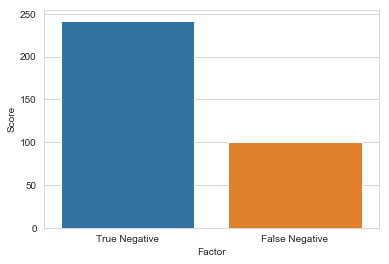

In [117]:
sb.barplot(x='Factor',y='Score',data=negatives)

In [118]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8013245033112583
Recall: 0.7076023391812866


Our model predicts 80% of the time, a passengers survival correctly (precision). 
The recall tells us that it predicted the survival of 71 % of the people who actually survived.

# F-Score

You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. 
As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [119]:
from sklearn.metrics import f1_score
print('F1score',f1_score(Y_train, predictions))


F1score 0.7515527950310559


There we have it, a 75 % F-score. The score is not that high, because we have a recall of 70%.

But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. 
This is a problem, because you sometimes want a high precision and sometimes a high recall. 
The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). 
This is called the precision/recall tradeoff. We will discuss this in the following section.

# Precision Recall Curve

For each person the Random Forest algorithm has to classify, it computes a probability based on a function 
and it classifies the person as survived (when the score is bigger the than threshold) or 
as not survived (when the score is smaller than the threshold). 
That's why the threshold plays an important part.

In [120]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

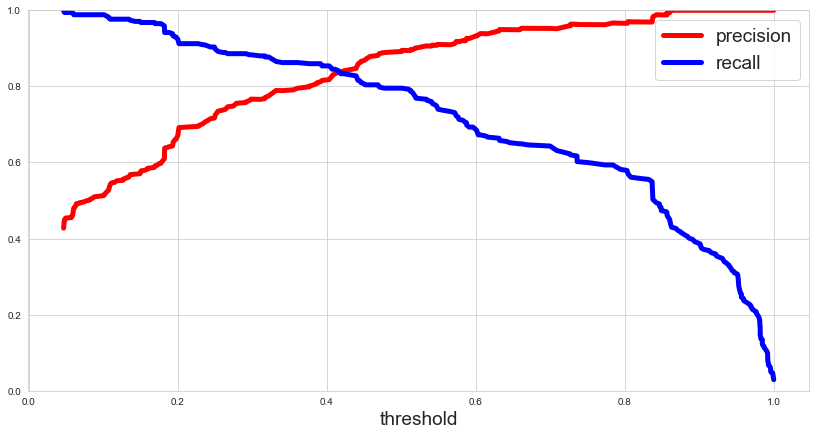

In [121]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 84%. 
Because of that you may want to select the precision/recall tradeoff before that - maybe at around 75 %.

You are now able to choose a threshold, that gives you the best precision/recall tradeoff 
for your current machine learning problem. If you want for example a precision of 80%, 
you can easily look at the plots and see that you would need a threshold of around 0.4. 
Then you could train a model with exactly that threshold and would get the desired accuracy.

Another way is to plot the precision and recall against each other

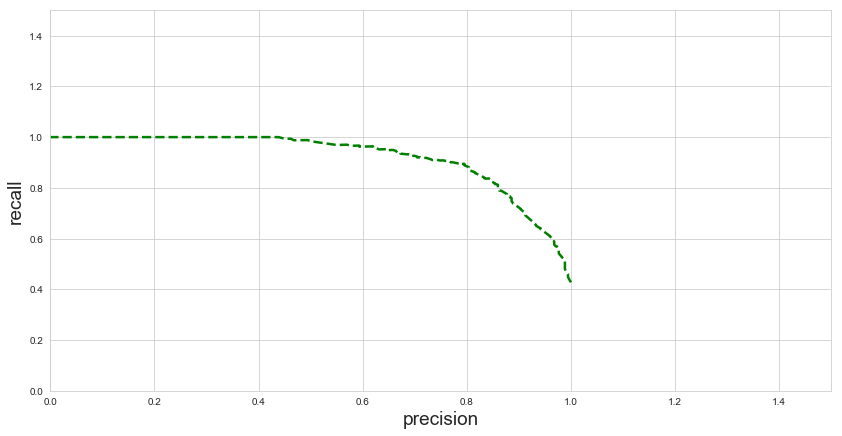

In [122]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

# ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. 
This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

In [123]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

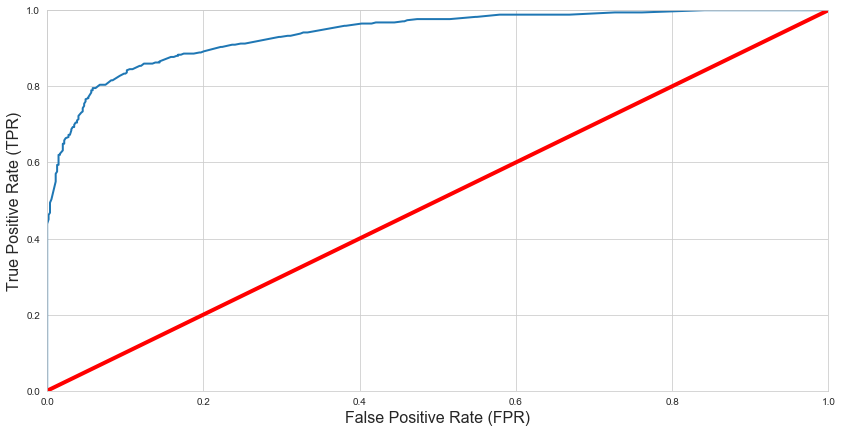

In [124]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

# ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [125]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9388441504489821


**Submission**

In [126]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('submission.csv', index=False)